#  Feature Engineering & EDA Assignment 2

### Mortgage Default Risk & Fraud Detection

### Author: Chloe Du (jd3631)

### Part 1: To explore and gain insights from a dataset

In [76]:
#import necessary libraries
import numpy as np 
import pandas as pd

from scipy import stats  #for some statistics
from scipy.stats import norm, skew

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

import warnings 
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn  #ignore warnings (from sklearn and seaborn)

import os
print(os.listdir('.'))


['.Rhistory', '03-Decision Trees and Random Forest Project - Solutions.ipynb', '04-Finance Project - Solutions.ipynb', '.config', 'Music', 'PROJECT2.ipynb', 'ANZ Internship Project - Task 2.ipynb', 'Lecture9 Advanced Trees.R', '.condarc', 'BankAssignment.ipynb', '.docker', '04-Numpy Exercises.ipynb', '5210BankAssignment-YixingZhang.ipynb', '02-911 Calls Data Capstone Project - Solutions.ipynb', 'ANZ Internship Project.ipynb', '03-Linear Regression Project - Solutions.ipynb', 'Untitled1.ipynb', '03-K Nearest Neighbors Project - Solutions.ipynb', '.DS_Store', 'Final Exam (Qinzhe Xu).ipynb', '.CFUserTextEncoding', 'Week11DataAnalysisPlotting_cont.ipynb', 'anzhi.ipynb', '.subversion', 'Feature Engineering & EDA Assignment - jd3631 Chloe Du.ipynb', 'Lecture 6 Feature Selection.R', 'jd3631_DU_banking_assignment-1.ipynb', 'Untitled.ipynb', '02-Decision Trees and Random Forest Project.ipynb', '02-SF Salaries Exercise - Solutions.ipynb', 'S2 A3.R', 'Pictures', 'Lecture 5 Logistic Regression.R',

In [77]:
# Now to import and put the dataset 
data = pd.read_csv("/Users/jiayangdu/Desktop/Columbia University /APAN 5420/XYZloan_default_selected_vars.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 89 columns):
Unnamed: 0      80000 non-null int64
Unnamed: 0.1    80000 non-null int64
id              80000 non-null int64
loan_default    80000 non-null int64
AP001           80000 non-null int64
AP002           80000 non-null int64
AP003           80000 non-null int64
AP004           80000 non-null int64
AP005           80000 non-null object
AP006           80000 non-null object
AP007           80000 non-null int64
AP008           80000 non-null int64
AP009           80000 non-null int64
TD001           80000 non-null int64
TD002           80000 non-null int64
TD005           80000 non-null int64
TD006           80000 non-null int64
TD009           80000 non-null int64
TD010           80000 non-null int64
TD013           80000 non-null int64
TD014           80000 non-null int64
TD015           80000 non-null int64
TD022           60402 non-null float64
TD023           72337 non-null float

In [79]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


In [80]:
#replace -99 to na, since -99 may be systematic default value
data.replace('-99',' ',inplace=True)

In [81]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TD048,79999,0.999988
TD055,79999,0.999988
TD062,79999,0.999988
TD044,79997,0.999962
TD051,79995,0.999938
TD061,79990,0.999875
TD054,79988,0.999850
TD022,19598,0.244975
TD023,7663,0.095787
TD024,3694,0.046175


In [82]:
#dealing with missing data
#We'll consider that when more than 5% of the data is missing, we should delete the corresponding variable and pretend it never existed. 
#This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables  that we should delete.
data = data.drop((missing_data[missing_data['Total'] >= 7663]).index,1)
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1,inplace=True)
data.describe()

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,0.727925,1.986962,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,0.445031,1.807445,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,0.000000,1.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,1.000000,2.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,1.000000,3.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,1.000000,20.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


In [86]:
#replace na with median for each column
data.fillna(data.median(),inplace = True)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [87]:
# Note: our target variable is "loan_default", so we have a logistic problem (0 or 1)
# However, there are 89 variables, too much, so we have to pick up top 15 features

In [88]:
##descriptive statistics summary
data['loan_default'].describe()

count    80000.000000
mean         0.193600
std          0.395121
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_default, dtype: float64

In [89]:
# This variable is actually binary (0 or 1), so we can convert its data type to get a deeper insight
data['loan_default'] = data['loan_default'].apply(lambda x:str(x))

In [90]:
data['loan_default'].describe()

count     80000
unique        2
top           0
freq      64512
Name: loan_default, dtype: object

In [91]:
# in order to do the further analysis, we convert the data type back
data['loan_default'] = data['loan_default'].apply(lambda x:int(x))

In [92]:
data['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

### PART 2: Data Wrangling

In [93]:
################# categorical features
# deal with categorical features AP006 OS_TYPE
data.groupby('AP006')['id'].count().sort_values(ascending = False)

AP006
h5         44246
ios        17159
android    17140
api         1455
Name: id, dtype: int64

In [94]:
#I'll need to convert them into integers so our model can use the data. 
from sklearn.preprocessing import LabelEncoder

cat_features = ['AP006']
encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = data[cat_features].apply(encoder.fit_transform)
encoded.head(10)
# Since data and encoded have the same index and I can easily join them
# create a new feature: [0: android ; 1:api ; 2:h5 ; 3:ios]
data['system'] = encoded

In [95]:
# deal with categorical features MB007 MOBILE_BRAND
data.groupby('MB007')['id'].count().sort_values(ascending = False).head(20)

MB007
WEB        43850
IPHONE7     6335
IPHONE8     5186
OPPO        4313
IPHONE9     4237
VIVO        3673
HUAWEI      2458
Noinfo      2055
SAMSUNG     1646
XIAOMI      1470
HONOR       1066
IPHONE6     1005
MEIZU        604
GIONEE       419
LEECO        298
IPHONE5      235
LETV         170
360          117
COOLPAD      105
ZTE           82
Name: id, dtype: int64

In [96]:
# simplify this variable by:
# combing all the iphone brand (1)
# combing  every other brand as other brand (2)
def MB007(brand):
    if brand == 'WEB':
        return 0
    if (brand == 'IPHONE7' or brand == 'IPHONE8' or brand == 'IPHONE9'):
        return 1
    else:
        return 2
# create a new feature: [0: WEB ; 1:IPHONE ; 2:OTHER]
data['phone_brand'] = data['MB007'].apply(MB007)

In [97]:
# new feature 'brand_system' which combine them
interactions = data['MB007'] + "_" + data['AP006']
label_enc = LabelEncoder()
data = data.assign(brand_system=label_enc.fit_transform(interactions))

In [98]:
################# datetime features
#AP005 DATE_APPLIED

In [99]:
data['AP005'] = pd.to_datetime(data['AP005'])
#Converting timestamps
data = data.assign(hour=data.AP005.dt.hour,
               day=data.AP005.dt.day,
               month=data.AP005.dt.month,
               year=data.AP005.dt.year)

In [100]:
################# numerical features
#CR009 AMT_LOAN_TOTAL

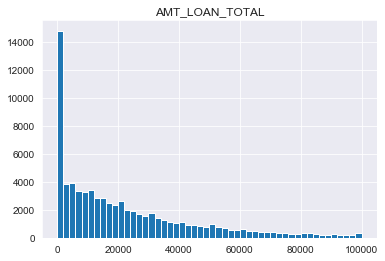

In [101]:
plt.hist(data.CR009, range=(0, 100000), bins=50);
plt.title('AMT_LOAN_TOTAL');

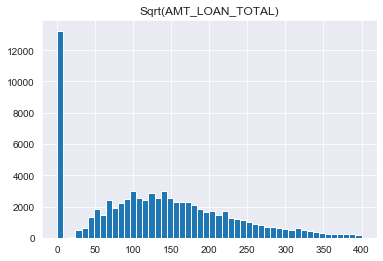

In [102]:
plt.hist(np.sqrt(data.CR009), range=(0, 400), bins=50);
plt.title('Sqrt(AMT_LOAN_TOTAL)');

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


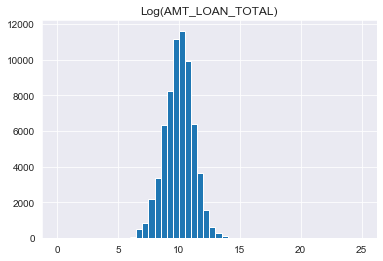

In [103]:
plt.hist(np.log(data.CR009), range=(0, 25), bins=50);
plt.title('Log(AMT_LOAN_TOTAL)');

In [104]:
data['Log(AMT_LOAN_TOTAL)'] = data['CR009'].apply(lambda x:np.log(x))

### PART 3: Feature Selection

#### Feature Selection method 1: Univariate Feature Selection ANOVA F-value

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_cols = data.columns.drop(['loan_default','AP005','AP006','MB007', 'Log(AMT_LOAN_TOTAL)'])

# Keep 15 features
selector = SelectKBest(f_classif, k=15)

X_new = selector.fit_transform(data[feature_cols], data['loan_default'])
X_new

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[  1. ,  12. ,   1. , ..., -98. , -98. , -98. ],
       [  1. ,  12. ,   2. , ..., -98. , -98. , -98. ],
       [  4. ,  12. ,   2. , ..., -98. , -98. , -98. ],
       ...,
       [  1. ,  12. ,   1. , ..., -98. , -98. , -98. ],
       [  1. ,  12. ,   0. , ..., -98. , -98. , -98. ],
       [  3. ,  12. ,   5. , ...,  17.4,  17.4,  17.4]])

In [106]:
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

In [107]:
feature_cols = data.columns.drop(['loan_default','AP005','AP006','MB007','Log(AMT_LOAN_TOTAL)'])
train, valid, _ = get_data_splits(data)

# Keep 15 features
selector = SelectKBest(f_classif, k=15)

X_new = selector.fit_transform(train[feature_cols], train['loan_default'])
X_new

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[  1.,  12.,   1., ..., -98., -98.,   7.],
       [  1.,  12.,   2., ..., -98., -98.,   5.],
       [  4.,  12.,   2., ..., -98., -98.,   8.],
       ...,
       [  1.,  12.,   2., ..., -98., 104.,   6.],
       [  3.,  12.,   2., ..., -98., -98.,   3.],
       [  1.,   6.,   2., ...,  29.,  29.,   2.]])

In [108]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,id,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,CD172,CD173,MB005,system,phone_brand,brand_system,hour,day,month,year
0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
valid[selected_columns].head()

,AP003,AP004,TD001,TD005,TD006,TD009,TD010,TD013,TD014,TD024,PA022,PA028,PA029,PA031,MB005
64000,4,12,3,4,1,4,1,4,1,0.0,-1.0,-98.0,-98.0,-98.0,6.0
64001,1,12,0,0,0,0,0,0,0,4.0,-1.0,-98.0,-98.0,-98.0,3.0
64002,1,12,0,0,0,3,1,4,1,6.0,64.0,25.5,25.5,-98.0,16.0
64003,1,12,0,2,1,4,2,4,2,8.0,-1.0,-98.0,-98.0,-98.0,2.0
64004,3,3,1,2,1,3,2,4,2,4.0,17.0,0.0,0.0,0.0,5.0


In [110]:
df2 = data[['loan_default','AP003', 'AP004', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD024', 'PA022', 'PA028', 'PA029','PA031','MB005']]

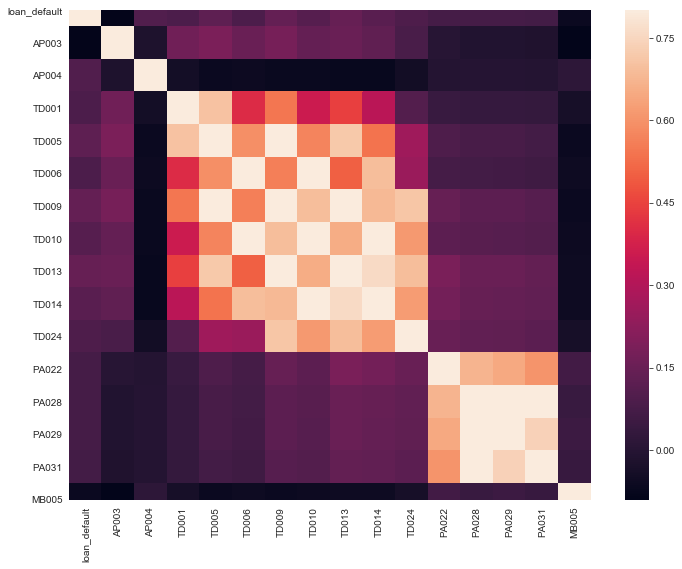

In [111]:
#correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Feature Selection method 2:  L1 regularization

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

train, valid, _ = get_data_splits(data)

X, y = train[train.columns.drop(['loan_default','AP005','AP006','MB007','Log(AMT_LOAN_TOTAL)'])], train['loan_default']

# Set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

array([[3.100e+01, 2.000e+00, 1.000e+00, ..., 6.000e+00, 7.000e+00,
        2.017e+03],
       [2.700e+01, 1.000e+00, 1.000e+00, ..., 6.000e+00, 4.000e+00,
        2.017e+03],
       [3.300e+01, 1.000e+00, 4.000e+00, ..., 1.000e+00, 7.000e+00,
        2.017e+03],
       ...,
       [2.400e+01, 2.000e+00, 1.000e+00, ..., 1.200e+01, 7.000e+00,
        2.017e+03],
       [2.700e+01, 2.000e+00, 3.000e+00, ..., 1.200e+01, 7.000e+00,
        2.017e+03],
       [3.200e+01, 1.000e+00, 1.000e+00, ..., 5.000e+00, 7.000e+00,
        2.017e+03]])

In [114]:
# Get back the kept features as a DataFrame with dropped columns as all 0s
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

# Dropped columns have values of all 0s, keep other columns 
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
valid[selected_columns].head(15)

,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,...,CD170,CD172,CD173,MB005,system,phone_brand,brand_system,hour,day,month
64000,34,2,4,12,5,5,1,3,1,4,...,3318.0,5697.0,3740.0,6.0,2,0,104,10,18,6
64001,22,1,1,12,4,3,0,0,0,0,...,974.0,974.0,974.0,3.0,2,0,104,16,12,5
64002,31,1,1,12,3,3,1,0,0,0,...,348.0,956.0,594.0,16.0,2,0,104,19,28,4
64003,24,2,1,12,1,4,0,0,0,2,...,532.0,1202.0,892.0,2.0,2,0,104,19,25,6
64004,26,1,3,3,4,4,1,1,1,2,...,159.0,186.0,159.0,5.0,2,0,104,15,22,6
64005,38,1,1,12,4,2,0,4,2,8,...,47.0,66.0,47.0,1.0,2,0,104,13,1,4
64006,34,2,1,12,4,4,1,2,0,4,...,215.0,582.0,563.0,3.0,2,0,104,14,24,5
64007,36,1,3,12,2,2,1,2,1,3,...,3674.0,8965.0,5857.0,10.0,2,0,104,8,6,5
64008,28,1,3,12,4,4,1,1,1,4,...,4421.0,5366.0,5366.0,1.0,3,1,45,18,4,5
64009,24,2,3,12,4,4,1,0,0,5,...,1499.0,1536.0,1536.0,4.0,0,2,87,10,29,5


#### Method 3: 3.1 Weight of Evidence and Information Value

In [164]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

 #define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)
    

In [165]:
final_iv, IV = data_vars(data,data.loan_default)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1077: RuntimeWarning: invalid value encountered in double_scalars
  return a + (b - a) * fraction


In [166]:
IV = IV.rename(columns={'VAR_NAME':'index'})

In [167]:
IV.sort_values(['IV'],ascending=0)

,index,IV
4,AP005,0.44
68,TD013,0.14
66,TD009,0.12
64,TD005,0.10
69,TD014,0.08
...,...,...
74,TD027,0.00
75,TD028,0.00
76,TD029,0.00
3,AP004,0.00


##### 3.2 variable importance

In [168]:
features = data[data.columns.difference(['loan_default','AP005','AP006','MB007','Log(AMT_LOAN_TOTAL)'])]
labels = data['loan_default']

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.9784


In [169]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [170]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
76,id,0.03
45,CR009,0.02
64,TD013,0.02
7,CD008,0.02
23,CD121,0.02
...,...,...
71,TD028,0.00
69,TD026,0.00
68,TD025,0.00
46,CR012,0.00


##### 3.3 Recursive feature elimination

In [171]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(features, labels)

In [172]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [173]:
Selected[Selected['RFE'] == True]

,index,RFE
1,AP002,True
2,AP003,True
3,AP004,True
5,AP008,True
6,AP009,True
43,CR004,True
44,CR005,True
47,CR015,True
48,CR017,True
49,CR018,True


##### 3.4 Variable Importance - Extratrees Classifier¶

In [124]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.01611938 0.00792406 0.01528434 0.0125384  0.01465296 0.01433853
 0.00991432 0.01375397 0.0131903  0.01362296 0.01352116 0.01379802
 0.01237277 0.01168056 0.01226676 0.01177466 0.01205157 0.01242991
 0.01280658 0.01403508 0.0134738  0.01335736 0.01331517 0.0135028
 0.01386361 0.01304695 0.0129889  0.01263297 0.01324013 0.01306696
 0.01324952 0.01246644 0.01321275 0.01388065 0.01309128 0.01265591
 0.01257877 0.01353276 0.01349027 0.01319845 0.01270885 0.0133788
 0.01318725 0.01491108 0.01249644 0.0154378  0.         0.01541001
 0.01461544 0.01558708 0.01552603 0.01654416 0.01005404 0.01043717
 0.01056732 0.010036   0.00760699 0.00906774 0.01599929 0.01307502
 0.01938006 0.01397666 0.01816971 0.01558665 0.01990121 0.0179464
 0.01427891 0.01781158 0.         0.         0.         0.
 0.         0.01175214 0.01648075 0.01639387 0.01689758 0.01490108
 0.00891579 0.00903935 0.        ]


In [125]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [126]:
FI = FI.reset_index()

In [127]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
64,TD013,0.019901
60,TD005,0.019380
62,TD009,0.018170
65,TD014,0.017946
67,TD024,0.017812
...,...,...
71,TD028,0.000000
70,TD027,0.000000
69,TD026,0.000000
68,TD025,0.000000


##### 3.5 Chi Square

In [128]:
df1 = data.copy()

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df1[i] = d[i].transform(df1[i])

In [129]:
features1 = df1[df1.columns.difference(['loan_default','AP005','AP006','MB007','Log(AMT_LOAN_TOTAL)'])]
labels1 = df1['loan_default']

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features1, labels1)

In [131]:
import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)

[   229.80927046     76.42482031    576.89285132    158.93049949
    100.24965049     85.29432902     12.05846878 370733.96744598
  13113.91373027    584.76159366   2143.63321039     77.21135406
     19.15641046     67.64574999     35.71786497    176.28070417
     21.95240963    443.17333286    577.80303737   5361.82828176
   5330.20716908   8009.55917139   8485.33361027   9720.19167539
  10810.2433444     387.10278982   2021.7036908    2071.56190644
    387.8088491    1373.89588529   4328.14738797   4268.54058914
 313028.95001338 180572.19102784   1612.60803878   1792.80533608
   2246.46014292  82738.54321648  87983.45985992 162860.41234609
 169913.54843946 208752.80969727 219072.74277364    120.87645266
    152.3985324  221359.83636595             nan    112.87125565
    281.56356593    151.74188643    460.57275802    740.55787208
  23535.27782881  23656.05338644 969307.07864238 757644.11887383
 202035.07159637 755015.80471063   1048.48521867    269.29353077
   2830.87050337    896.7

In [132]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features1.columns)

chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
54,PA028,969307.08
55,PA029,757644.12
57,PA031,755015.80
7,CD008,370733.97
32,CD152,313028.95
...,...,...
69,TD026,nan
70,TD027,nan
71,TD028,nan
72,TD029,nan


##### 3.6 L1 feature selection

In [133]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [134]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)

l1 = l1.reset_index()
l1[l1['L1'] == True]

,index,L1
0,AP001,True
1,AP002,True
2,AP003,True
3,AP004,True
4,AP007,True
...,...,...
74,day,True
75,hour,True
77,month,True
79,system,True


##### 3.7 Combine all together

In [174]:
from functools import reduce
dfs = [IV, VI, FI, chi_sq, l1,  Selected]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [175]:
final_results.head()

,index,IV,RF,Extratrees,Chi_Square,L1,RFE
0,AP001,0.00,0.02,0.02,229.81,True,False
1,AP002,0.01,0.00,0.01,76.42,True,True
2,AP003,0.04,0.01,0.02,576.89,True,True
3,AP004,0.00,0.01,0.01,158.93,True,True
4,AP007,0.01,0.01,0.01,100.25,True,False


##### 3.8 Variable Score

In [176]:
#columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']
score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [177]:
score_table['final_score'] = score_table.sum(axis=1)

In [186]:
score_table.sort_values('final_score',ascending=0).head(15)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
64,TD013,1,1,1,0,1,1,5
60,TD005,1,0,1,0,0,1,3
65,TD014,1,0,1,0,0,1,3
62,TD009,1,0,1,0,0,1,3
43,CR004,0,0,0,0,1,1,2
44,CR005,0,0,0,0,1,1,2
47,CR015,0,0,0,0,1,1,2
48,CR017,0,0,0,0,1,1,2
49,CR018,0,0,0,0,1,1,2
51,MB005,0,0,0,0,1,1,2


##### 3.9 Multicollinearity - VIF (Addon)

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [181]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [183]:
vif

,Features,VIF
0,AP001,1.58
1,AP002,1.12
2,AP003,1.25
3,AP004,1.02
4,AP007,2.69
5,AP008,2.48
6,AP009,1.14
7,CD008,3.71
8,CD018,5.37
9,CD071,3.34


In [307]:
#According to the final score, i will select
#'AP002', 'AP003', 'AP004', 'AP008', 'AP009', 'CR004', 'CR005','TD009','PA031','CD008','CD152','TD001','TD013','TD005','TD014'

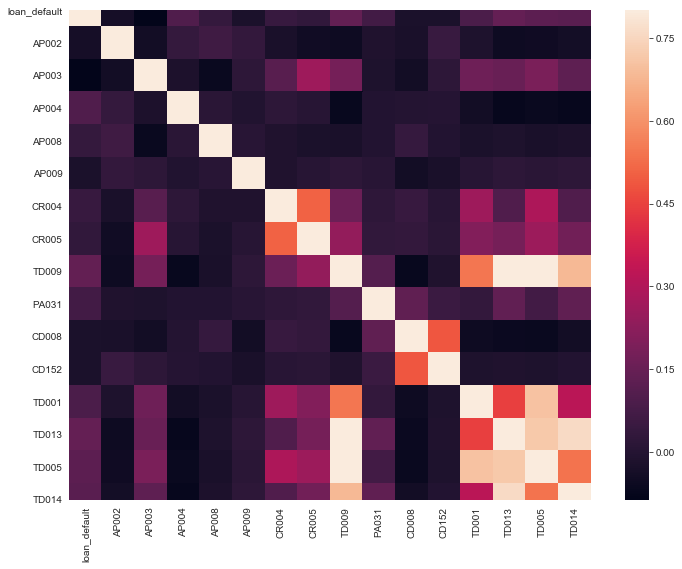

In [309]:
df2 = data[['loan_default','AP002', 'AP003', 'AP004', 'AP008', 'AP009', 'CR004', 'CR005','TD009','PA031','CD008','CD152','TD001','TD013','TD005','TD014']]
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [68]:
### there are a problem about the feature selection
###no matter what method , the features i selected out are not very good

### PART 4: Train Test Split & EDA

In [334]:
# train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.3,random_state=123)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

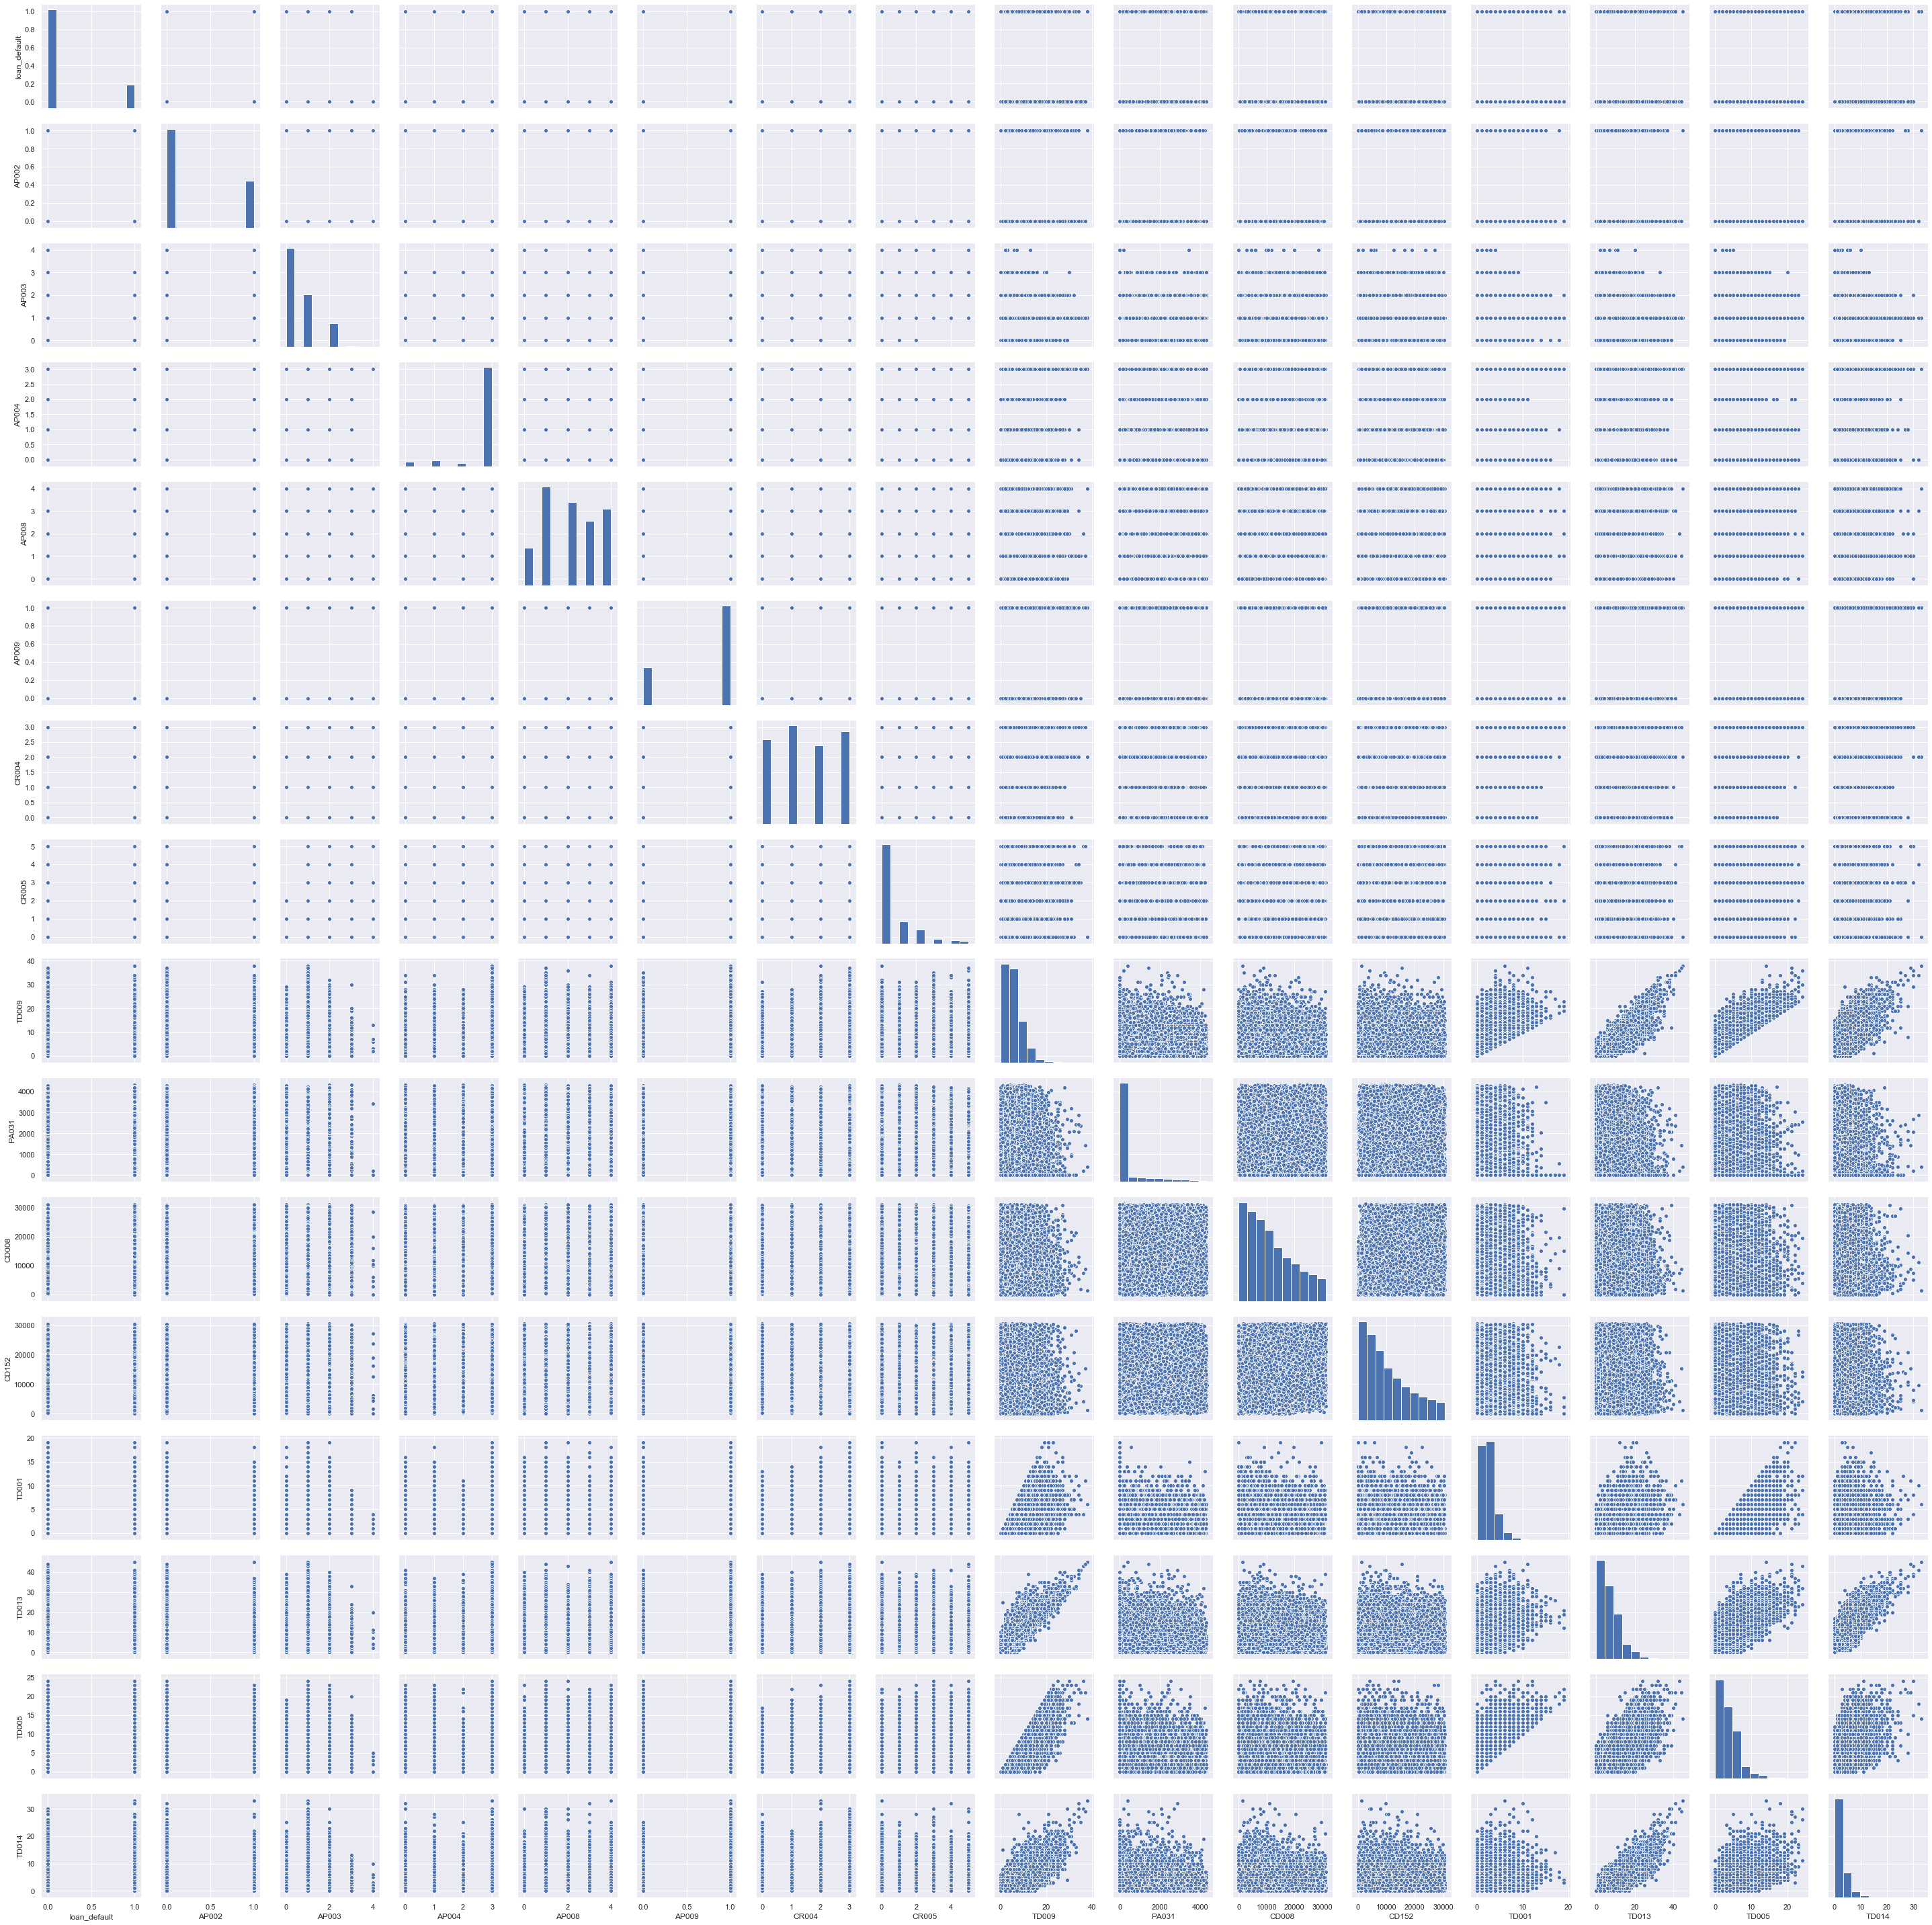

In [397]:
sns.set()
cols = ['loan_default','AP002', 'AP003', 'AP004', 'AP008', 'AP009', 'CR004', 'CR005','TD009','PA031','CD008','CD152','TD001','TD013','TD005','TD014']
sns.pairplot(train[cols], size = 2.5)
plt.show();

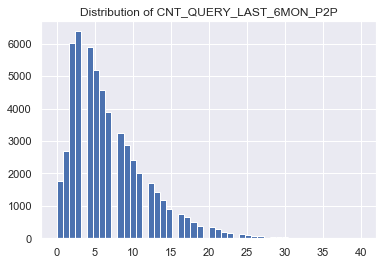

In [398]:
######### TD013 CNT_QUERY_LAST_6MON_P2P
plt.hist(train.TD013, range=(0, 40), bins=50);
plt.title('Distribution of CNT_QUERY_LAST_6MON_P2P');

'CNT_QUERY_LAST_6MON_P2P' is not normal. It shows 'peakedness', positive skewness.
But a simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. 

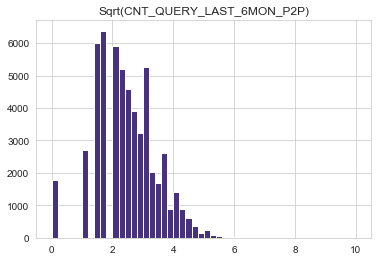

In [356]:
plt.hist(np.sqrt(train.TD013), range=(0, 10), bins=50);
plt.title('Sqrt(CNT_QUERY_LAST_6MON_P2P)');

Text(0.5, 1.0, 'Log(CNT_QUERY_LAST_6MON_P2P)')

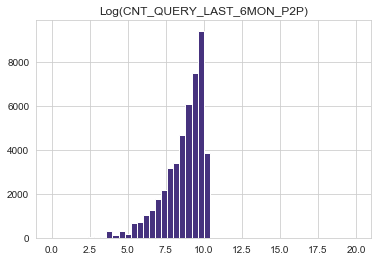

In [357]:
plt.hist(np.log(train.CR009), range=(0, 20), bins=50);
plt.title('Log(CNT_QUERY_LAST_6MON_P2P)')

In [354]:
######### AP002 CODE_GENDER
train.AP002.value_counts()

0    38039
1    17961
Name: AP002, dtype: int64

[Text(0.5, 7.0, 'Gender')]

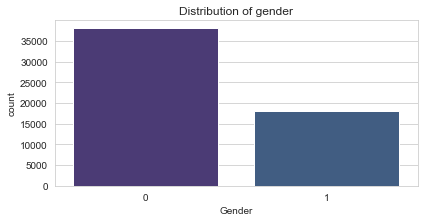

In [369]:
plt.figure(figsize=(6,3))
sns.set_style('whitegrid')
sns.set_palette('viridis')
ax = sns.countplot(train.AP002)
plt.tight_layout()
plt.title('Distribution of gender')
ax.set(xlabel='Gender')

Here, we could find more male than female (almost double) tend to apply for the mortagage

In [350]:
######### AP003 CODE_EDUCATION
train.AP003.value_counts()

0    31556
1    16662
2     7603
3      168
4       11
Name: AP003, dtype: int64

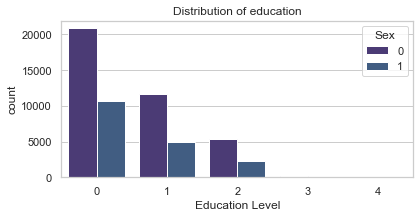

In [431]:
plt.figure(figsize=(6,3))
ax = sns.countplot(train.AP003,hue = train.AP002,dodge=True)
plt.tight_layout()
plt.title('Distribution of education')
ax.set(xlabel='Education Level')
plt.legend(title='Sex')

It seems like most of borrowers are less educated 

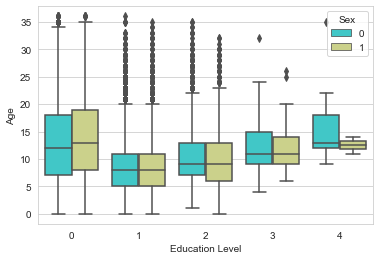

In [394]:
ax = sns.boxplot(x='AP003',y='AP001',hue='AP002', data=train,palette='rainbow')
ax.set(xlabel='Education Level', ylabel = 'Age')
plt.legend(title='Sex')

It shows that most of borrowers are younger and people who is less educated are normally older than people who are relatively well educated. (but it is obvious that the figure given is kind of problemetic) 

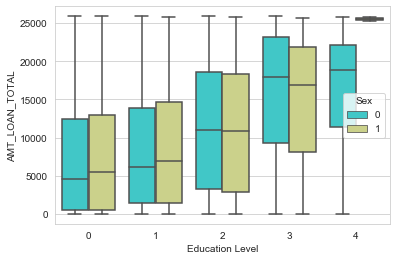

In [395]:
ax = sns.boxplot(x='AP003',y='CR009',hue='AP002',data=train,palette='rainbow')
ax.set(xlabel='Education Level', ylabel = 'AMT_LOAN_TOTAL')
plt.legend(title='Sex')

People who are well educated borrowed more than less-educated people, this may be due to the level of their income (maybe people who accept higher education make more money than others so that they have better ability to repay the loan, more likely to receive approval from mortgage lending instituitions)

In [359]:
######### AP004 LOAN_TERM
train.AP004.value_counts().sort_values()

2     1628
0     2386
1     2773
3    49213
Name: AP004, dtype: int64

[Text(0.5, 16.0, 'Loan Term')]

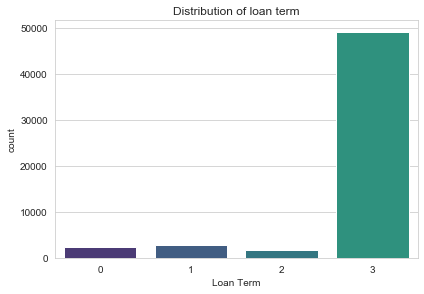

In [371]:
ax = sns.countplot(train.AP004)
plt.tight_layout()
plt.title('Distribution of loan term')
ax.set(xlabel='Loan Term')

most of loan is long-term

[Text(0, 0.5, 'AMT_LOAN_TOTAL'), Text(0.5, 0, 'Loan Term')]

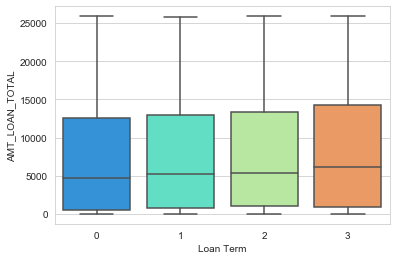

In [376]:
ax = sns.boxplot(x='AP004',y='CR009',data=train,palette='rainbow')
ax.set(xlabel='Loan Term', ylabel = 'AMT_LOAN_TOTAL')

It seems like, no matter how long people borrow, the average of loan ammount is of the same level.

In [364]:
######### AP008 FLAG_IP_CITY_NOT_APPL_CITY
train.AP008.value_counts()

1    15306
2    12939
4    11868
3    10015
0     5872
Name: AP008, dtype: int64

[Text(0.5, 16.0, 'FLAG_IP_CITY_NOT_APPL_CITY')]

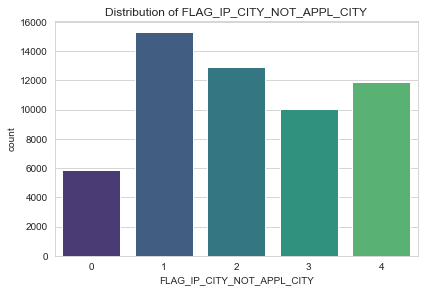

In [396]:
ax = sns.countplot(train.AP008)
plt.tight_layout()
plt.title('Distribution of FLAG_IP_CITY_NOT_APPL_CITY')
ax.set(xlabel='FLAG_IP_CITY_NOT_APPL_CITY')

In [ ]:
######### CR004 CNT_QUERY_TIME_LAST_1MON

In [402]:
train.CR004.value_counts()

1    15591
3    14634
0    13364
2    12411
Name: CR004, dtype: int64

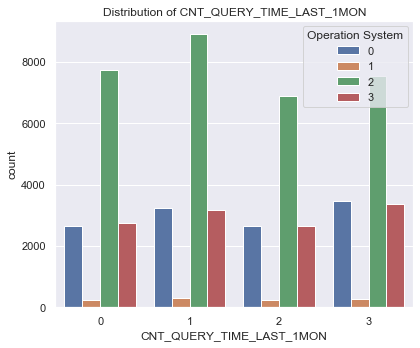

In [418]:
plt.figure(figsize=(6,5))
ax = sns.countplot(train.CR004, hue = train.AP006, dodge=True)
plt.title('Distribution of CNT_QUERY_TIME_LAST_1MON')
ax.set(xlabel='CNT_QUERY_TIME_LAST_1MON')
plt.tight_layout()
plt.legend(loc='upper right', title='Operation System')
#[0: android ; 1:api ; 2:h5 ; 3:ios]

 Most of people in the last month made a query once, and h5 is used frequently, and api is less used

In [ ]:
######### AP005 DATE_APPLIED

Text(0.5, 1, 'Average Volume by Hour')

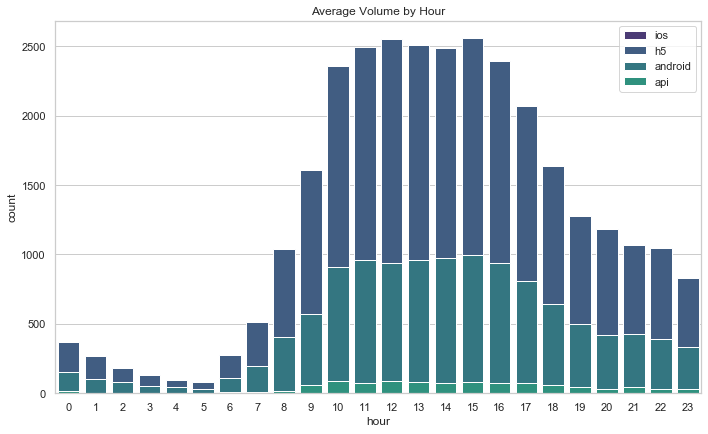

In [427]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('viridis')
sns.countplot(x=train.hour,hue = data.AP006,dodge=False)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Average Volume by Hour')

#h5 is used frequently, especially between 10 am and 4pm. The volume of h5 makes these three periods stand out. Most of h5 users prefers to apply during these time. 

Text(0.5, 1, 'Average Volume by day of week')

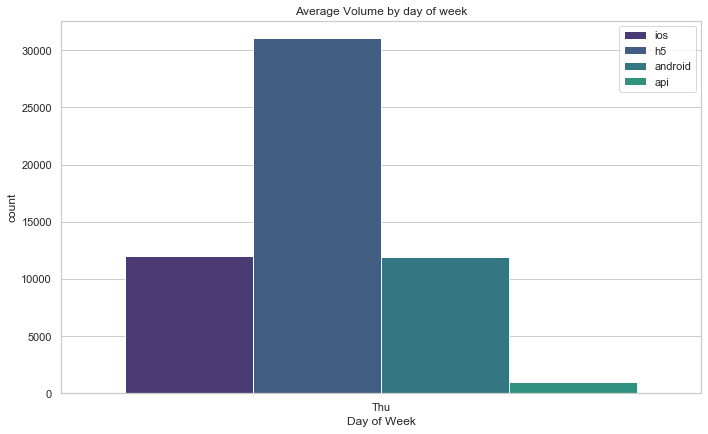

In [429]:
train['AP005'] = pd.to_datetime(train['AP005'])
train['Day of Week']=train['AP005'].apply(lambda x:x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
train['Day of Week'] = train['Day of Week'].map(dmap)

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('viridis')
sns.countplot(x=train['Day of Week'],hue = data.AP006,dodge= True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Average Volume by day of week')

It is interesting that all of applications happened on Thursday and most of borrowers use h5 system

1       39390
0        1078
2         139
280       122
308       121
        ...  
2514        1
2482        1
371         1
307         1
112         1
Name: PA031, Length: 3468, dtype: int64

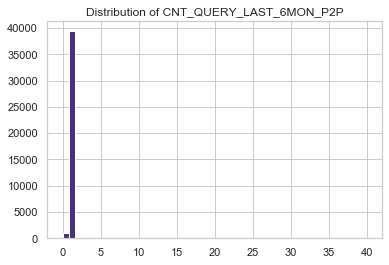

In [446]:
######### PA031 AVG_LEN_COLLECTION_CALLS
plt.hist(train.PA031, range=(0, 40), bins=50);
plt.title('Distribution of AVG_LEN_COLLECTION_CALLS');

train.PA031.value_counts()

0        2316
8346      259
1         115
1782       11
3251       11
         ... 
22997       1
29816       1
25722       1
27771       1
2047        1
Name: CD152, Length: 25888, dtype: int64

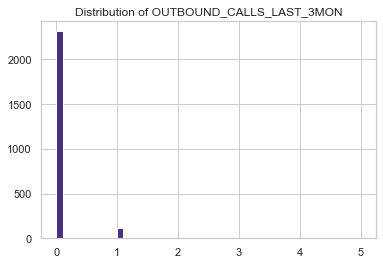

In [448]:
######### CD152 LEN_TOP3_FREQUENT_OUTBOUND_PHONE_NUMBERS_OUTBOUND_CALLS_LAST_3MON
plt.hist(train.CD152, range=(0, 5), bins=50);
plt.title('Distribution of OUTBOUND_CALLS_LAST_3MON');
train.CD152.value_counts()

### PART 5: Modelling

#### 1. Decision Tree

In [283]:
# use vif features
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.3,random_state=123)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train = train[list(vif['Features'])]
y_train = train['loan_default']
x_test = test[list(vif['Features'])]
y_test = test['loan_default']

In [284]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [285]:
pred_train = dtree.predict(x_train)
pred_test = dtree.predict(x_test)

In [286]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)
print(accuracy_train);print(accuracy_test)

1.0
0.7030416666666667


In [287]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), dtree.predict_proba(x_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), dtree.predict_proba(x_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(auc_train);print(auc_test)

1.0
0.5428969272908204


In [288]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     19406
           1       0.25      0.28      0.27      4594

    accuracy                           0.70     24000
   macro avg       0.54      0.54      0.54     24000
weighted avg       0.72      0.70      0.71     24000



In [289]:
print(confusion_matrix(y_test,pred_test))

[[15571  3835]
 [ 3292  1302]]


#### 2. Logistic Regression

In [322]:
#use features from Selected table
X1_train,X1_test,Y1_train,Y1_test=train_test_split(data[list(Selected['index'])],data['loan_default'],test_size=0.3,random_state=123)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X1_train,Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
pred_log = log_model.predict(X1_test)

In [324]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y1_test,pred_log))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     19406
           1       0.49      0.03      0.06      4594

    accuracy                           0.81     24000
   macro avg       0.65      0.51      0.48     24000
weighted avg       0.75      0.81      0.73     24000



In [325]:
metrics.accuracy_score(Y1_test,pred_log)

0.8083333333333333

### PART 6: Final Model and Model Performance — Evaluation 

#### for logistic model

#### 1. AUC & ROC

In [326]:
#AUC 
#predict the probability values from logistic regression model
predict_proba = pd.DataFrame(log_model.predict_proba(X1_test))
predict_proba.head()

,0,1
0,0.73,0.27
1,0.80,0.20
2,0.64,0.36
3,0.74,0.26
4,0.83,0.17


In [327]:
pred_log = pd.DataFrame(pred_log)
Y1_test1 = Y1_test.reset_index()
predictions = pd.concat([Y1_test1,pred_log,predict_proba],axis = 1)
predictions.columns = ['index', 'actual', 'predicted', 'default_0', 'default_1']
predictions.head()

,index,actual,predicted,default_0,default_1
0,23438,0,0,0.73,0.27
1,78749,0,0,0.80,0.20
2,43994,1,0,0.64,0.36
3,25959,1,0,0.74,0.26
4,20526,1,0,0.83,0.17


In [328]:
#We use the above table to compute the AUC score i.e. the Area Under the Curve.
auc_score = metrics.roc_auc_score( predictions.actual, predictions.default_1 )
round( float( auc_score ), 2 )

#The AUC score comes out to be 0.62

0.69

Text(0.5, 0, 'False Positive Rate')

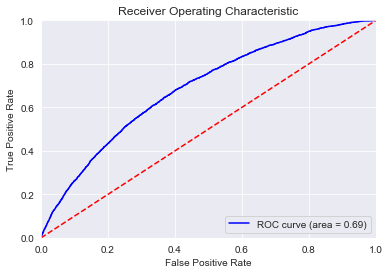

In [329]:
#ROC
fpr, tpr, threshold = metrics.roc_curve(Y1_test,predictions.default_1,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

This model actually performs fairly (I think this resutls from the feature selection)

#### 2.KS, Gain and Lift Chart

In [330]:
###for train set
Train_Data1 = train[['loan_default']]
Train_Data1['Prob'] = log_model.predict_proba(X1_train)[:,1]

#group the probabilities by quartiles and run the program to make 10 bins for the probabilities.
Train_Data1['decile'] = pd.qcut(Train_Data1['Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])

#now change the name of the variables for our understanding.
Train_Data1.columns = ['Defaulter','Probability','Decile']
Train_Data1.head()

,Defaulter,Probability,Decile
0,0,0.16,5
1,0,0.07,1
2,0,0.13,3
3,1,0.29,9
4,0,0.23,8


In [331]:
# Non-Defaulters can be calculated by subtracting 1 from the column of Defaulters.
Train_Data1['Non-Defaulter'] = 1-Train_Data1['Defaulter']

# make use of the pivot table to make the chart table to calculate KS statistics.
df2 = pd.pivot_table(data=Train_Data1,index=['Decile'],values=['Defaulter','Non-Defaulter','Probability'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Probability' : [np.min,np.max]})

#use reset_index for a better understanding of the table
df2.reset_index()

Decile Defaulter Non-Defaulter Probability     
               sum           sum        amax amin
0      1       234          5366        0.08 0.00
1      2       469          5131        0.11 0.08
2      3       614          4986        0.13 0.11
3      4       756          4844        0.16 0.13
4      5       869          4731        0.18 0.16
5      6      1075          4525        0.20 0.18
6      7      1259          4341        0.23 0.20
7      8      1498          4102        0.27 0.23
8      9      1808          3792        0.33 0.27
9     10      2312          3288        0.94 0.33

In [332]:
# rename the columns as per our requirement
df2.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
df2['Total_Cust'] = df2['Defaulter_Count']+df2['Non-Defaulter_Count']
df2

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust
Decile,,,,,
1,234,5366,0.08,0.00,5600
2,469,5131,0.11,0.08,5600
3,614,4986,0.13,0.11,5600
4,756,4844,0.16,0.13,5600
5,869,4731,0.18,0.16,5600
6,1075,4525,0.20,0.18,5600
7,1259,4341,0.23,0.20,5600
8,1498,4102,0.27,0.23,5600
9,1808,3792,0.33,0.27,5600


In [293]:
#Sort the min_score in descending order.
df3 = df2.sort_values(by='min_score',ascending=False)
df3

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust
Decile,,,,,
10,2312,3288,0.94,0.33,5600
9,1808,3792,0.33,0.27,5600
8,1498,4102,0.27,0.23,5600
7,1259,4341,0.23,0.20,5600
6,1075,4525,0.20,0.18,5600
5,869,4731,0.18,0.16,5600
4,756,4844,0.16,0.13,5600
3,614,4986,0.13,0.11,5600
2,469,5131,0.11,0.08,5600


In [294]:
# now calculate the defaulters and non-defaulters rate per decile.
df3['Default_Rate'] = (df3['Defaulter_Count'] / df3['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df3['Defaulter_Count'].sum()
non_default_sum = df3['Non-Defaulter_Count'].sum()
df3['Default %'] = (df3['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df3['Non_Default %'] = (df3['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)
df3

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %
Decile,,,,,,,,
10,2312,3288,0.94,0.33,5600,41.29%,21.22%,7.29%
9,1808,3792,0.33,0.27,5600,32.29%,16.60%,8.41%
8,1498,4102,0.27,0.23,5600,26.75%,13.75%,9.09%
7,1259,4341,0.23,0.20,5600,22.48%,11.56%,9.62%
6,1075,4525,0.20,0.18,5600,19.20%,9.87%,10.03%
5,869,4731,0.18,0.16,5600,15.52%,7.98%,10.49%
4,756,4844,0.16,0.13,5600,13.50%,6.94%,10.74%
3,614,4986,0.13,0.11,5600,10.96%,5.64%,11.05%
2,469,5131,0.11,0.08,5600,8.38%,4.31%,11.38%


In [295]:
#calculate KS Statistics using the above values
df3['ks_stats'] = np.round(((df3['Defaulter_Count'] / df3['Defaulter_Count'].sum()).cumsum() -(df3['Non-Defaulter_Count'] / df3['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
df3
#KS Statistics is the difference between the cumulative Defaulter and Non-Defaulter Rate.

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats
Decile,,,,,,,,,
10,2312,3288,0.94,0.33,5600,41.29%,21.22%,7.29%,13.93
9,1808,3792,0.33,0.27,5600,32.29%,16.60%,8.41%,22.12
8,1498,4102,0.27,0.23,5600,26.75%,13.75%,9.09%,26.78
7,1259,4341,0.23,0.20,5600,22.48%,11.56%,9.62%,28.71
6,1075,4525,0.20,0.18,5600,19.20%,9.87%,10.03%,28.55
5,869,4731,0.18,0.16,5600,15.52%,7.98%,10.49%,26.04
4,756,4844,0.16,0.13,5600,13.50%,6.94%,10.74%,22.24
3,614,4986,0.13,0.11,5600,10.96%,5.64%,11.05%,16.82
2,469,5131,0.11,0.08,5600,8.38%,4.31%,11.38%,9.75


In [296]:
#We will now find the KS Statistics value which is the max of KS statistics scored for each decile.
flag = lambda x: '*****' if x == df3['ks_stats'].max() else ''
df3['max_ks'] = df3['ks_stats'].apply(flag)
df3

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
Decile,,,,,,,,,,
10,2312,3288,0.94,0.33,5600,41.29%,21.22%,7.29%,13.93,
9,1808,3792,0.33,0.27,5600,32.29%,16.60%,8.41%,22.12,
8,1498,4102,0.27,0.23,5600,26.75%,13.75%,9.09%,26.78,
7,1259,4341,0.23,0.20,5600,22.48%,11.56%,9.62%,28.71,*****
6,1075,4525,0.20,0.18,5600,19.20%,9.87%,10.03%,28.55,
5,869,4731,0.18,0.16,5600,15.52%,7.98%,10.49%,26.04,
4,756,4844,0.16,0.13,5600,13.50%,6.94%,10.74%,22.24,
3,614,4986,0.13,0.11,5600,10.96%,5.64%,11.05%,16.82,
2,469,5131,0.11,0.08,5600,8.38%,4.31%,11.38%,9.75,


In [297]:
##################test set
#The same process shall be carried with the test data set 
test_Data1 = test[['loan_default']]
test_Data1['Prob'] = log_model.predict_proba(X1_test)[:,1]

#group the probabilities by quartiles and run the program to make 10 bins for the probabilities.
test_Data1['decile'] = pd.qcut(test_Data1['Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])

#now change the name of the variables for our understanding.
test_Data1.columns = ['Defaulter','Probability','Decile']

# Non-Defaulters can be calculated by subtracting 1 from the column of Defaulters.
test_Data1['Non-Defaulter'] = 1-test_Data1['Defaulter']

# make use of the pivot table to make the chart table to calculate KS statistics.
df4 = pd.pivot_table(data=test_Data1,index=['Decile'],values=['Defaulter','Non-Defaulter','Probability'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Probability' : [np.min,np.max]})

#use reset_index for a better understanding of the table
df4.reset_index()

df4.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
df4['Total_Cust'] = df4['Defaulter_Count']+df4['Non-Defaulter_Count']

#Sort the min_score in descending order.
df5 = df4.sort_values(by='min_score',ascending=False)

# now calculate the defaulters and non-defaulters rate per decile.
df5['Default_Rate'] = (df5['Defaulter_Count'] / df5['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df5['Defaulter_Count'].sum()
non_default_sum = df5['Non-Defaulter_Count'].sum()
df5['Default %'] = (df5['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df5['Non_Default %'] = (df5['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)

#calculate KS Statistics using the above values
df5['ks_stats'] = np.round(((df5['Defaulter_Count'] / df5['Defaulter_Count'].sum()).cumsum() -(df5['Non-Defaulter_Count'] / df5['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100

#We will now find the KS Statistics value which is the max of KS statistics scored for each decile.
flag = lambda x: '*****' if x == df5['ks_stats'].max() else ''
df5['max_ks'] = df5['ks_stats'].apply(flag)
df5


,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
Decile,,,,,,,,,,
10,967,1433,0.99,0.33,2400,40.29%,21.05%,7.38%,13.66,
9,739,1661,0.33,0.27,2400,30.79%,16.09%,8.56%,21.19,
8,640,1760,0.27,0.23,2400,26.67%,13.93%,9.07%,26.05,
7,507,1893,0.23,0.20,2400,21.12%,11.04%,9.75%,27.34,*****
6,455,1945,0.20,0.18,2400,18.96%,9.90%,10.02%,27.22,
5,365,2035,0.18,0.16,2400,15.21%,7.95%,10.49%,24.68,
4,331,2069,0.16,0.13,2400,13.79%,7.21%,10.66%,21.22,
3,273,2127,0.13,0.11,2400,11.38%,5.94%,10.96%,16.20,
2,210,2190,0.11,0.08,2400,8.75%,4.57%,11.29%,9.49,


##### Gains chart

In [298]:
#To plot the Gain Chart, we need to calculate the cumulative of defaulters percentage. 
#This has to be calculated for both train and test datasets. 
#Hence, we will make use of the output generated while computing KS statistic.
df_test1 = df5.copy()
df_test1['default_cum%'] = np.round(((df5['Defaulter_Count'] / df5['Defaulter_Count'].sum()).cumsum()), 4) * 100
df_test1

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks,default_cum%
Decile,,,,,,,,,,,
10,967,1433,0.99,0.33,2400,40.29%,21.05%,7.38%,13.66,,21.05
9,739,1661,0.33,0.27,2400,30.79%,16.09%,8.56%,21.19,,37.14
8,640,1760,0.27,0.23,2400,26.67%,13.93%,9.07%,26.05,,51.07
7,507,1893,0.23,0.20,2400,21.12%,11.04%,9.75%,27.34,*****,62.10
6,455,1945,0.20,0.18,2400,18.96%,9.90%,10.02%,27.22,,72.01
5,365,2035,0.18,0.16,2400,15.21%,7.95%,10.49%,24.68,,79.95
4,331,2069,0.16,0.13,2400,13.79%,7.21%,10.66%,21.22,,87.16
3,273,2127,0.13,0.11,2400,11.38%,5.94%,10.96%,16.20,,93.10
2,210,2190,0.11,0.08,2400,8.75%,4.57%,11.29%,9.49,,97.67


In [299]:
#default_cum%_test column is extracted separately.
df_test2 = df_test1[['default_cum%']]
df_test2.reset_index()
df_test2.columns = ['default_cum%_test']
df_test2

,default_cum%_test
Decile,
10,21.05
9,37.14
8,51.07
7,62.10
6,72.01
5,79.95
4,87.16
3,93.10
2,97.67


In [300]:
#Adding Base values in another column.
df3['default_cum%'] = np.round(((df3['Defaulter_Count'] / df3['Defaulter_Count'].sum()).cumsum()), 4) * 100
df_train = df3[['default_cum%']]
df_train.reset_index()
df_train.columns = ['default_cum%_train']
df_train2 = df_train.copy()
df_train2['Base %'] = [10,20,30,40,50,60,70,80,90,100]
df_train2

,default_cum%_train,Base %
Decile,,
10,21.22,10
9,37.82,20
8,51.57,30
7,63.13,40
6,72.99,50
5,80.97,60
4,87.91,70
3,93.55,80
2,97.85,90


In [301]:
# Concatenating the above dataset with the default_cum%_train.
final = pd.concat([df_train2,df_test2],axis=1)
final

,default_cum%_train,Base %,default_cum%_test
Decile,,,
10,21.22,10,21.05
9,37.82,20,37.14
8,51.57,30,51.07
7,63.13,40,62.10
6,72.99,50,72.01
5,80.97,60,79.95
4,87.91,70,87.16
3,93.55,80,93.10
2,97.85,90,97.67


Text(0.5, 1.0, 'Gains Chart')

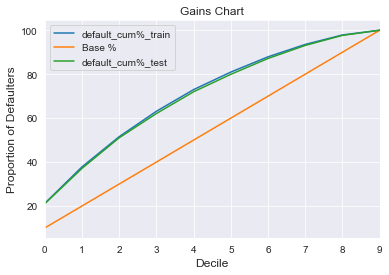

In [302]:
#Creating a Gain chart using the above table.
gains_chart = final.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Proportion of Defaulters",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")

##### Lift Chart

In [303]:
#We use the dataset created above and add lift_train and lift_test column to it along with 1 as the baseline.
final2 = final.copy()
final2['lift_train'] = (final['default_cum%_train']/final['Base %'])
final2['lift_test'] = (final['default_cum%_test']/final['Base %'])
final2['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
final2

,default_cum%_train,Base %,default_cum%_test,lift_train,lift_test,Baseline
Decile,,,,,,
10,21.22,10,21.05,2.12,2.10,1
9,37.82,20,37.14,1.89,1.86,1
8,51.57,30,51.07,1.72,1.70,1
7,63.13,40,62.10,1.58,1.55,1
6,72.99,50,72.01,1.46,1.44,1
5,80.97,60,79.95,1.35,1.33,1
4,87.91,70,87.16,1.26,1.25,1
3,93.55,80,93.10,1.17,1.16,1
2,97.85,90,97.67,1.09,1.09,1


In [304]:
# We just keep the columns that are required to create the lift chart.
lift_chart = final2[['lift_train','lift_test','Baseline']]
lift_chart

,lift_train,lift_test,Baseline
Decile,,,
10,2.12,2.10,1
9,1.89,1.86,1
8,1.72,1.70,1
7,1.58,1.55,1
6,1.46,1.44,1
5,1.35,1.33,1
4,1.26,1.25,1
3,1.17,1.16,1
2,1.09,1.09,1


(0.0, 2)

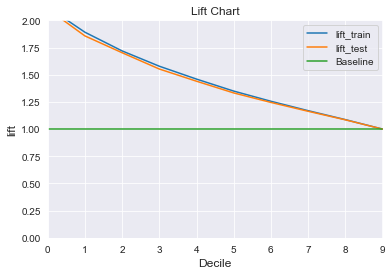

In [338]:
#now finally create the lift chart using the above table.
lift_chart1 = lift_chart.plot(kind='line',use_index=False)
lift_chart1.set_ylabel("lift",fontsize=12)
lift_chart1.set_xlabel("Decile",fontsize=12)
lift_chart1.set_title("Lift Chart")
lift_chart1.set_ylim(0.0,2)


A machine learning model will rank loan applicants into high-default-risk segments to low risk segments, so the bad loan applicants are ranked in the top deciles.This figure means Decile 1 of this logistic Model can get around 1.9 times of the high-default-risk clients compared to random selection. Therefore, the instituitions need to pay attention to avoid or monitor frequently clients ranked in the top deciles. 

### END

### Reflection

https://towardsdatascience.com/avoid-these-deadly-modeling-mistakes-that-may-cost-you-a-career-b9b686d89f2c

1. dummy variables 2. bin continuous variables to find the 99% quantile and imput the following with the 99% value 3. to find out outliers; check the variable one by one and deal with the outliers especially when you wanna do the logistic model 4. decision tree will cut the x variables into two branches, suppose your x variable is categorical with na (in decision tree, it considers na as categorial), so you do not need to deal with na. 5. for continuous variable how we deal with the outliers, so firstly cap or floor it (you change the value to 99% tile; if you change it to median, it changes too much ); but in decision tree, decision trees treats continuous variable as categorical variable as well, so the decison tree is not sensitive to outliers at all (it does not hurt if you do capping and flooring but you do not have to) 

suppose you are a data consultant, you have to go through the whole data science process from; the model can assign loan applicants with default probability. how do we talk to client to assess the model (to give percentage hints -  this is what gains table does)  -- chris‘s powerpoint